# Introdução ao Machine Learning

<br>
<img src="img/machine_learning.png">
<br>


*fonte: Wikipedia*

O aprendizado automático (português brasileiro) ou a aprendizagem automática (português europeu) ou também aprendizado de máquina (português brasileiro) ou aprendizagem de máquina (português europeu) (em inglês: machine learning) é um subcampo da ciência da computação que evoluiu do estudo de reconhecimento de padrões e da teoria do aprendizado computacional em inteligência artificial. Em 1959, Arthur Samuel definiu aprendizado de máquina como o "campo de estudo que dá aos computadores a habilidade de aprender sem serem explicitamente programados (livre tradução). O aprendizado automático explora o estudo e construção de algoritmos que podem aprender de seus erros e fazer previsões sobre dados. Tais algoritmos operam construindo um modelo a partir de inputs amostrais a fim de fazer previsões ou decisões guiadas pelos dados ao invés de simplesmente seguindo inflexíveis e estáticas instruções programadas. Enquanto que na inteligência artificial existem dois tipos de raciocínio (o indutivo, que extrai regras e padrões de grandes conjuntos de dados, e o dedutivo), o aprendizado de máquina só se preocupa com o indutivo.

Algumas partes do aprendizado automático estão intimamente ligadas (e muitas vezes sobrepostas) à estatística computacional; uma disciplina que foca em como fazer previsões através do uso de computadores, com pesquisas focando nas propriedades dos métodos estatísticos e sua complexidade computacional. Ela tem fortes laços com a otimização matemática, que produz métodos, teoria e domínios de aplicação para este campo. O aprendizado automático é usado em uma variedade de tarefas computacionais onde criar e programar algoritmos explícitos é impraticável. Exemplos de aplicações incluem filtragem de spam, reconhecimento ótico de caracteres (OCR), processamento de linguagem natural, motores de busca, diagnósticos médicos, bioinformática, reconhecimento de fala, reconhecimento de escrita, visão computacional e locomoção de robôs. O aprendizado de máquinas é às vezes confundido com mineração de dados, que é um sub-campo que foca mais em análise exploratória de dados e é conhecido como aprendizado não supervisionado. No campo da análise de dados, o aprendizado de máquinas é um método usado para planejar modelos complexos e algoritmos que prestam-se para fazer predições- no uso comercial, isso é conhecido como análise preditiva. Esses modelos analíticos permitem que pesquisadores, cientistas de dados, engenheiros, e analistas possam "produzir decisões e resultados confiáveis e repetitíveis" e descobrir os "insights escondidos" através do aprendizado das relações e tendências históricas nos dados.

Agora, vamos analisar vários exemplos simples de aplicação de métodos de aprendizagem supervisionada e não supervisionada

### Exemplo de aprendizagem supervisionada: Regressão linear simples

Como exemplo desse processo, vamos considerar uma regressão linear simples, ou seja, o caso comum de ajustar uma linha a dados com a forma $(x, y)$.

Vamos gerar o seguinte conjunto de dados para nosso exemplo de regressão:

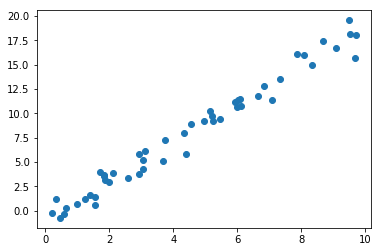

In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline 

rng = np.random.RandomState(42)
x = 10 * rng.rand(50)
y = 2 * x - 1 + rng.randn(50)

# Traçamos
plt.scatter(x, y);

In [2]:
x.shape,y.shape

((50,), (50,))

Depois de gerar os dados, podemos usar a receita que estudamos antes. Vamos ver os passos do processo: 

#### 1. Selecionar uma “classe de modelo”

Em Scikit-Learn, cada classe de modelo é representada com uma classe de Python. 

Então, por exemplo, se queremos calcular um modelo de regressão linear simples, podemos importar a classe de regressão linear desta forma:

In [3]:
from sklearn.linear_model import LinearRegression

/anaconda3/lib/python3.6/site-packages/sklearn/utils/fixes.py:313: FutureWarning: numpy not_equal will not check object identity in the future. The comparison did not return the same result as suggested by the identity (`is`)) and will change.
  _nan_object_mask = _nan_object_array != _nan_object_array


Lembre que também existem outros modelos de regressão linear mais gerais. Você pode ler mais sobre eles na [documentação ``sklearn.linear_model``](http://Scikit-Learn.org/stable/modules/linear_model.html). 

#### 2. Escolher os hiperparâmetros do modelo

É importante destacar que *uma classe de modelo não é a mesma coisa que uma instância de modelo*.

Depois de definir a classe de modelo, ainda é preciso tomar algumas decisões. Dependendo da classe de modelo escolhida para trabalhar, poderíamos ter que responder a uma ou mais perguntas, por exemplo:

- Queremos ajustar também uma interceptação (intercept = True)?
- Queremos que o modelo esteja normalizado?
- Queremos adicionar features calculadas a partir do input para aumentar a flexibilidade do modelo?
- Que grau de "regularização" queremos usar no modelo?

Esses são exemplos das decisões importantes que devem ser tomadas 
**depois de selecionar a classe de modelo a usar**.

Frequentemente, essas escolhas são representadas como *hiperparâmetros*, ou parâmetros que devem ser definidos antes que o modelo seja ajustado aos dados. 

Em Scikit-Learn, os hiperparâmetros são escolhidos como argumentos na instanciação do modelo. Nas próximas aulas, vamos explorar como justificar quantitativamente a escolha de hiperparâmetros.  

Para o nosso exemplo de regressão linear, podemos instanciar a classe ``LinearRegression`` e especificar que gostaríamos de ajustar a interceptação usando o hiperparâmetro ``fit_intercept``: 

In [11]:
model = LinearRegression(fit_intercept=True)
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

**Atenção**: quando o modelo é instanciado, a única ação que acontece é o armazenamento dos valores de hiperparâmetros.

Especificamente, ainda não aplicamos o modelo a nenhum dado: a API de Scikit-Learn faz uma distinção muito clara entre a *escolha do modelo com hiperparâmetros* e a *aplicação do modelo aos dados*. 

#### 3. Preparar os dados em uma matriz de features e um vetor target

Já falamos da representação de dados de Scikit-Learn, que exige uma matriz de features de duas dimensões e um vetor target de uma dimensão.

Aqui, a variável target ``y`` já está no formato correto (um array de comprimento ``n_samples``), mas precisamos processar os dados em ``x`` para transformá-los em uma matriz de tamanho ``[n_samples, n_features]``.

Nesse caso, isso se reduz a uma simples mudança de forma (reshaping) do array de uma dimensão: 

In [9]:
X = x[:, np.newaxis]
X.shape

# Outra forma de fazer isso
# X = x.reshape(-1,1)

(50, 1)

#### 4. Ajustar o modelo aos dados

Agora, é hora de aplicar o modelo aos dados.
É possível fazer isso com o método ``fit()`` da instância de modelo.

In [12]:
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

O método ``fit()`` faz uma sequência de cálculos internos que dependem do modelo, e os resultados dessas operações são armazenados em atributos específicos da classe de modelo que o usuário poderá explorar.

Em Scikit-learn, por convenção, todos os atributos que representam os parâmetros dos modelos que foram aprendidos durante o processo de treinamento com ``fit()`` têm `sublinhados` nos nomes; por exemplo, neste modelo linear, podemos observar os parâmetros coef_ e intercept_:

In [13]:
model.coef_

array([ 1.9776566])

In [14]:
model.intercept_

-0.90331072553111635

Esses dois parâmetros representam a inclinação ( o $\beta_1$ do statsmodel) e o e o intercepto ($\beta_0$) do ajuste linear simples aos dados. 
Fazendo uma comparação com a definição do conjunto de dados sintético criado no início do exemplo, podemos ver que eles estão muito próximos dos definidos inicialmente ao gerar os dados, 2 e -1.

Uma pergunta que surge com frequência tem a ver com a incerteza (uncertainty) nesses parâmetros internos do modelo. 

Em geral, Scikit-Learn não oferece ferramentas para tirar conclusões sobre o estado interno dos modelos: interpretar os parâmetros de um modelo tem muito mais a ver com *modelagem estatística* que com *machine learning*.

Machine learning, por sua vez, enfoca a qualidade com a qual o modelo *faz previsões*.

Se quiser investigar o significado dos parâmetros de ajuste dentro do modelo, existem outras ferramentas, incluindo o pacote de python [Statsmodels](http://statsmodels.sourceforge.net/).

In [15]:
model.predict([[10]])

array([ 18.87325528])

#### 5. Prever para dados desconhecidos

Depois que o modelo é treinado, a principal tarefa na aprendizagem supervisionada é fazer uma avaliação com base no que o modelo diz sobre os novos dados que não fizeram parte do **conjunto de treinamento**. 

Em Scikit-Learn, é possível fazer isso usando o método ``predict()``. 
No contexto deste exemplo, o “novo conjunto de dados” será um vetor de valores *x*, e observaremos os valores *y* previstos pelo modelo.

In [18]:
xfit = np.linspace(-1, 11)
xfit

array([ -1.        ,  -0.75510204,  -0.51020408,  -0.26530612,
        -0.02040816,   0.2244898 ,   0.46938776,   0.71428571,
         0.95918367,   1.20408163,   1.44897959,   1.69387755,
         1.93877551,   2.18367347,   2.42857143,   2.67346939,
         2.91836735,   3.16326531,   3.40816327,   3.65306122,
         3.89795918,   4.14285714,   4.3877551 ,   4.63265306,
         4.87755102,   5.12244898,   5.36734694,   5.6122449 ,
         5.85714286,   6.10204082,   6.34693878,   6.59183673,
         6.83673469,   7.08163265,   7.32653061,   7.57142857,
         7.81632653,   8.06122449,   8.30612245,   8.55102041,
         8.79591837,   9.04081633,   9.28571429,   9.53061224,
         9.7755102 ,  10.02040816,  10.26530612,  10.51020408,
        10.75510204,  11.        ])

In [19]:
xfit.shape

(50,)

Assim como antes, precisamos manipular os valores *x* em uma matriz de features de tamanho ``[n_samples, m_features]``. Só depois desse passo será possível utilizá-la como argumento para a previsão. 

In [20]:
Xfit = xfit[:, np.newaxis]
Xfit[:10]

array([[-1.        ],
       [-0.75510204],
       [-0.51020408],
       [-0.26530612],
       [-0.02040816],
       [ 0.2244898 ],
       [ 0.46938776],
       [ 0.71428571],
       [ 0.95918367],
       [ 1.20408163]])

In [21]:
yfit = model.predict(Xfit)
yfit

array([ -2.88096733,  -2.39664326,  -1.9123192 ,  -1.42799513,
        -0.94367106,  -0.459347  ,   0.02497707,   0.50930113,
         0.9936252 ,   1.47794926,   1.96227333,   2.44659739,
         2.93092146,   3.41524552,   3.89956959,   4.38389366,
         4.86821772,   5.35254179,   5.83686585,   6.32118992,
         6.80551398,   7.28983805,   7.77416211,   8.25848618,
         8.74281024,   9.22713431,   9.71145837,  10.19578244,
        10.68010651,  11.16443057,  11.64875464,  12.1330787 ,
        12.61740277,  13.10172683,  13.5860509 ,  14.07037496,
        14.55469903,  15.03902309,  15.52334716,  16.00767122,
        16.49199529,  16.97631936,  17.46064342,  17.94496749,
        18.42929155,  18.91361562,  19.39793968,  19.88226375,
        20.36658781,  20.85091188])

Por último, para visualizar os resultados, vamos traçar primeiro os dados originais e, em seguida, o ajuste do modelo linear:

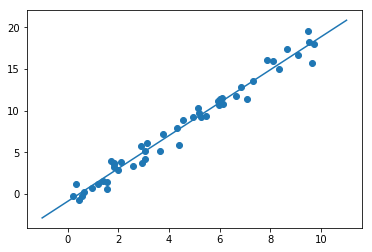

In [22]:
plt.scatter(x, y)
plt.plot(xfit, yfit);

Normalmente, a eficácia do modelo é avaliada por meio da comparação dos resultados com algum baseline conhecido, como veremos no próximo exemplo.

### Exemplo de aprendizagem supervisionada: Classificação com o conjunto de dados Iris

Vamos ver mais um exemplo desse processo, usando o conjunto de dados Iris que mencionamos antes. 
A pergunta será esta: usando um modelo treinado em uma parte do conjunto de dados Iris, com que eficácia será possível prever os valores restantes?

In [52]:
import seaborn as sns
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [24]:
iris.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [25]:
iris.species.value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

In [26]:
iris.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


Text(0,0.5,'petal_width')

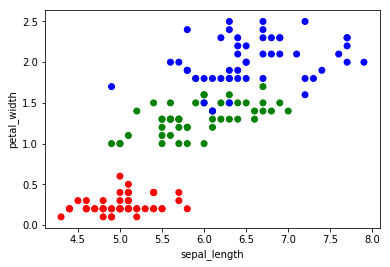

In [65]:
fig, ax = plt.subplots()
colors = {'setosa':'red', 'virginica':'blue', 'versicolor':'green'}
species = ['setosa', 'versicolor', 'virginica']
ax.scatter(x=iris['sepal_length'],
           y=iris['petal_width'],
           c=iris['species'].apply(lambda x: colors[x]))

ax.set_xlabel('sepal_length')
ax.set_ylabel('petal_width')

/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


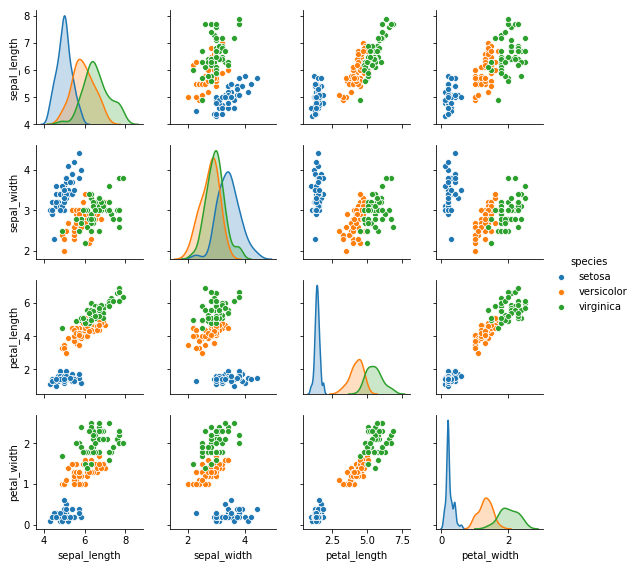

In [49]:
import seaborn as sns

sns.pairplot(iris, hue="species", size=2)

In [67]:
X_iris = iris.drop('species', axis=1)
X_iris.shape

(150, 4)

In [68]:
y_iris = iris['species']
y_iris.shape

(150,)

Para esta tarefa, vamos usar um modelo generativo bastante simples, conhecido como Naive Bayes Gaussiano, que presume que cada classe é construída a partir de uma distribuição Gaussiana. Vamos ver mais detalhes sobre ele mais adiante no curso.

Como é muito rápido e não tem hiperparâmetros para escolher, Naive Bayes Gaussiano costuma ser um bom modelo para usar como classificação baseline antes de explorar se é possível conseguir melhorias usando modelos mais sofisticados.



Com os dados preparados, podemos seguir a receita para prever o restante:

In [69]:
from sklearn.naive_bayes import GaussianNB # 1. escolher a classe de modelo
model = GaussianNB() # 2. instanciar o modelo
model.fit(X_iris, y_iris) # 3. ajustar o modelo aos dados
yhat = model.predict(X_iris) # 4. prever
yhat

array(['setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'versicolor', 'versicolor', 'virginica',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'virginica', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'virginica', 'versi

In [70]:
comparativo = list(zip(list(y_iris), list(yhat)))

acertos = 0
erros = 0

for row in comparativo:
    if row[0]==row[1]:
        acertos += 1
    else:
        erros += 1
        
print(f'''Acertos: {acertos},
Erros: {erros},
Taxa: {acertos/(acertos+erros)}''')

Acertos: 144,
Erros: 6,
Taxa: 0.96


Alguém pode dizer que não é justo eu usar um dado de treinamento como um dado de teste, afinal ele participou das "regras" que o algoritmou criou para separar o dataset ...

Queremos avaliar o modelo em dados que não tenham sido usados no treinamento, por isso vamos dividir os dados em um *conjunto de treinamento* e um *conjunto de teste*.

Poderíamos fazer isso manualmente, mas é mais prático usar a função ``train_test_split``.

In [71]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X_iris, y_iris, random_state=1)

In [72]:
print(Xtest.shape)
print(ytest.shape)

(38, 4)
(38,)


In [73]:
print(Xtrain.shape)
print(ytrain.shape)

(112, 4)
(112,)


In [74]:
from sklearn.naive_bayes import GaussianNB # 1. escolher a classe de modelo
model = GaussianNB() # 2. instanciar o modelo
model.fit(Xtrain, ytrain) # 3. ajustar o modelo aos dados
yhat = model.predict(Xtest) # 4. prever com dados *NOVOS* (que não participaram do treino)

Por último, podemos usar a função ``accuracy_score`` para estudar a proporção dos valores previstos que coincidem com o valor real correspondente a essa observação.

In [75]:
# from sklearn.metrics import accuracy_score # método nutella
# accuracy_score(ytest, y_model)

comparativo = list(zip(list(ytest), list(yhat)))

acertos = 0
erros = 0
for row in comparativo:
    if row[0]==row[1]:
        acertos += 1
    else:
        erros += 1
        
print(f'''Acertos: {acertos},
Erros: {erros},
Taxa: {acertos/(acertos+erros)}''')

Acertos: 37,
Erros: 1,
Taxa: 0.9736842105263158


Com precisão superior a 97%, podemos ver que até mesmo esse simples algoritmo de classificação é efetivo para esse conjunto de dados específico.

### Exemplo de aprendizagem não supervisionada: Dimensionalidade de Iris

Como exemplo de problema de aprendizagem não supervisionado, vamos ver como reduzir a dimensionalidade dos dados de Iris para facilitar a visualização. 

Lembrem que o conjunto de dados Iris tem quatro dimensões: há quatro features medidas para cada observação (sample).

A tarefa de redução da dimensionalidade é investigar se existe uma representação apropriada de baixa dimensionalidade que mantenha as características essenciais do conjunto de dados original. 

Frequentemente, a redução da dimensionalidade é usada como ajuda para visualizar os dados: afinal, é muito mais fácil traçar os dados em duas dimensões que em quatro ou mais. 

Neste exemplo, vamos usar Principal Component Analysis (PCA), que é uma técnica rápida de redução linear da dimensionalidade. 
Vamos pedir para o modelo retornar dois componentes, ou seja, uma representação bidimensional dos dados. 

### PCA

<br>
<img src="img/pca.png">
<br>


*fonte: Wikipedia*

A Análise de Componentes Principais (ACP) ou Principal Component Analysis (PCA) é um procedimento matemático que utiliza uma transformação ortogonal (ortogonalização de vetores) para converter um conjunto de observações de variáveis possivelmente correlacionadas num conjunto de valores de variáveis linearmente não correlacionadas chamadas de componentes principais. O número de componentes principais é menor ou igual ao número de variáveis originais. Esta transformação é definida de forma que o primeiro componente principal tem a maior variância possível (ou seja, é responsável pelo máximo de variabilidade nos dados), e cada componente seguinte, por sua vez, tem a máxima variância sob a restrição de ser ortogonal a (i.e., não correlacionado com) os componentes anteriores. Os componentes principais são garantidamente independentes apenas se os dados forem normalmente distribuídos (conjuntamente). O PCA é sensível à escala relativa das variáveis originais. Dependendo da área de aplicação, o PCA é também conhecido como transformada de Karhunen-Loève (KLT) discreta, transformada de Hotelling ou decomposição ortogonal própria (POD). 

Para documentação oficial [clique aqui](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)

Seguindo a sequência de passos apresentada anteriormente, temos:

In [76]:
# 1. Selecionar a classe de modelo
from sklearn.decomposition import PCA  

# 2. Instanciar o modelo com hiperparâmetros
model = PCA(n_components=2)

# 3. Ajustar aos dados. Observar que não especificamos “y” 
model.fit(X_iris)

# 4. Transformar os dados em duas dimensões
X_2D = model.transform(X_iris)

In [77]:
X_iris.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [83]:
X_iris.shape

(150, 4)

In [78]:
X_2D[:5]

array([[-2.68412563,  0.31939725],
       [-2.71414169, -0.17700123],
       [-2.88899057, -0.14494943],
       [-2.74534286, -0.31829898],
       [-2.72871654,  0.32675451]])

In [81]:
X_2D.shape

(150, 2)

Agora, vamos traçar os resultados. Uma forma rápida de fazer isso é inserir os resultados no ``DataFrame`` original de Iris e usar o método ``lmplot`` de Seaborn para mostrar os resultados:


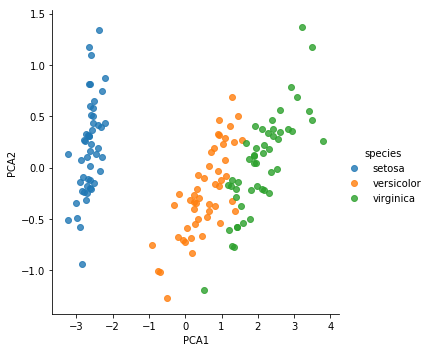

In [84]:
iris_pca = iris.copy(deep=True)
iris_pca['PCA1'] = X_2D[:, 0]
iris_pca['PCA2'] = X_2D[:, 1]
sns.lmplot('PCA1', 'PCA2', hue='species', data=iris_pca, fit_reg=False);

Vemos que, na representação em duas dimensões, as espécies estão relativamente bem separadas, ainda que o algoritmo PCA não tivesse conhecimento das tags das espécies de flores! 

Isso indica que uma classificação relativamente simples deveria funcionar com esse conjunto de dados, como vimos antes. 

### Testando a acurácia do DataSet criado com PCA

In [127]:
from sklearn.model_selection import train_test_split
Xtrain_pca, Xtest_pca, ytrain_pca, ytest_pca = train_test_split(X_2D, y_iris, random_state=1)

In [131]:
from sklearn.naive_bayes import GaussianNB # 1. escolher a classe de modelo
model = GaussianNB() # 2. instanciar o modelo
model.fit(X_2D, y_iris) # 3. ajustar o modelo aos dados
yhat_pca = model.predict(Xtest_pca) # 4. prever
yhat_pca

array(['setosa', 'versicolor', 'versicolor', 'setosa', 'virginica',
       'versicolor', 'virginica', 'setosa', 'setosa', 'virginica',
       'versicolor', 'setosa', 'virginica', 'versicolor', 'versicolor',
       'setosa', 'versicolor', 'versicolor', 'setosa', 'setosa',
       'versicolor', 'versicolor', 'virginica', 'setosa', 'virginica',
       'versicolor', 'setosa', 'setosa', 'versicolor', 'virginica',
       'versicolor', 'virginica', 'versicolor', 'virginica', 'virginica',
       'setosa', 'versicolor', 'setosa'], 
      dtype='<U10')

In [132]:
# from sklearn.metrics import accuracy_score # método nutella
# accuracy_score(ytest, y_model)

comparativo = list(zip(list(ytest_pca), list(yhat_pca)))

acertos = 0
erros = 0
for row in comparativo:
    if row[0]==row[1]:
        acertos += 1
    else:
        erros += 1
        
print(f'''Acertos: {acertos},
Erros: {erros},
Taxa: {acertos/(acertos+erros)}''')

Acertos: 37,
Erros: 1,
Taxa: 0.9736842105263158


### Testando PCA com tr§es dimensões

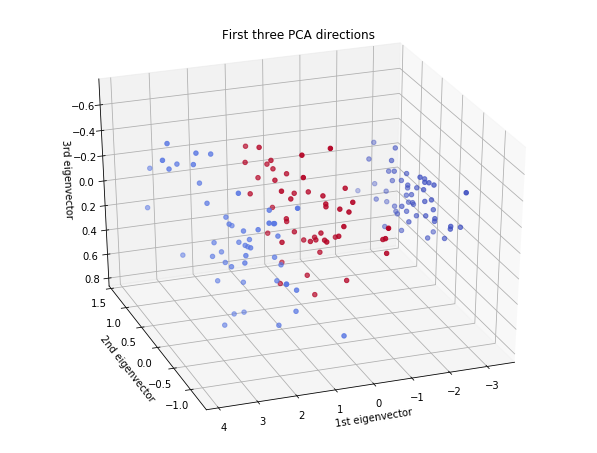

In [122]:
from mpl_toolkits.mplot3d import Axes3D

# Podemos também reduzir as 4 dimensões originais para 3 por exemplo e plotar um gráfico em 3d:
iris = sns.load_dataset('iris')

X = X_iris
Y = y_iris
z = {'setosa': 5, 'versicolor': 25, 'virginica': 7}

fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)

X_reduced = PCA(n_components=3).fit_transform(X_iris)

ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=Y.map(z),
            cmap=plt.cm.coolwarm)

ax.set_title("First three PCA directions")

ax.set_xlabel("1st eigenvector")
ax.set_ylabel("2nd eigenvector")
ax.set_zlabel("3rd eigenvector")

plt.show()

In [133]:
from sklearn.model_selection import train_test_split
Xtrain_reduced, Xtest_reduced, ytrain_reduced, ytest_reduced = train_test_split(X_reduced, y_iris, random_state=1)

from sklearn.naive_bayes import GaussianNB # 1. escolher a classe de modelo
model = GaussianNB() # 2. instanciar o modelo
model.fit(X_reduced, y_iris) # 3. ajustar o modelo aos dados
yhat_reduced = model.predict(Xtest_reduced) # 4. prever
yhat_reduced

array(['setosa', 'versicolor', 'versicolor', 'setosa', 'virginica',
       'virginica', 'virginica', 'setosa', 'setosa', 'virginica',
       'versicolor', 'setosa', 'virginica', 'versicolor', 'versicolor',
       'setosa', 'versicolor', 'versicolor', 'setosa', 'setosa',
       'versicolor', 'versicolor', 'virginica', 'setosa', 'virginica',
       'versicolor', 'setosa', 'setosa', 'versicolor', 'versicolor',
       'versicolor', 'virginica', 'versicolor', 'virginica', 'virginica',
       'setosa', 'versicolor', 'setosa'], 
      dtype='<U10')

In [134]:
# from sklearn.metrics import accuracy_score # método nutella
# accuracy_score(ytest, y_model)

comparativo = list(zip(list(ytest_reduced), list(yhat_reduced)))

acertos = 0
erros = 0
for row in comparativo:
    if row[0]==row[1]:
        acertos += 1
    else:
        erros += 1
        
print(f'''Acertos: {acertos},
Erros: {erros},
Taxa: {acertos/(acertos+erros)}''')

Acertos: 35,
Erros: 3,
Taxa: 0.9210526315789473


# Aprendizagem não supervisionada: Clustering com Iris

Vamos aplicar um algoritmo de clustering ao conjunto de dados Iris.

Um algoritmo de clustering tenta encontrar grupos diferentes sem fazer referência a tags nos dados. 

Vamos usar um método avançado de clustering chamado Gaussian Mixture Model (GMM). 
O GMM tenta modelar os dados como uma coleção subgrupos Gaussianos. 

### Gaussian Mixture Model (GMM)

<br>
<img src="img/gmm.png">
<br>

O modelo de mistura gaussiana é um modelo probabilístico que assume que todos os pontos de dados são gerados a partir de uma mistura de um número finito de distribuições gaussianas com parâmetros desconhecidos. Pode-se pensar em modelos de mistura como generalizando o agrupamento k-means para incorporar informações sobre a estrutura de covariância dos dados, bem como os centros dos gaussianos latentes.

O Scikit-learn implementa classes diferentes para estimar modelos de mistura gaussiana, que correspondem a diferentes estratégias de estimativa, detalhadas abaixo.

O objeto GaussianMixture implementa o algoritmo de expectativa de maximização (EM) para ajustar modelos de mistura de Gauss. Ele também pode desenhar elipsóides de confiança para modelos multivariados e calcular o Bayesian Information Criterion para avaliar o número de clusters nos dados. É fornecido um método GaussianMixture.fit que aprende um Modelo Gaussiano de Mistura a partir dos dados do trem. Dados dados de teste, pode atribuir a cada amostra que o Gaussian provavelmente pertence ao método GaussianMixture.predict.

A GaussianMixture vem com diferentes opções para restringir a covariância das classes de diferença estimadas: covariância esférica, diagonal, amarrada ou total.

Para informações completas [clique aqui](https://scikit-learn.org/stable/modules/mixture.html)

Podemos ajustar o GMM da seguinte forma:

In [86]:
# 1. Escolhemos a classe de modelo
from sklearn.mixture import GaussianMixture

# 2. Instanciamos o modelo com hiperparâmetros
model = GaussianMixture(n_components=3, covariance_type='full')

# 3. Ajustamos aos dados. Observar que “y” não é especificado
model.fit(X_iris)

# 4. Definimos os nomes dos clusters
y_gmm = model.predict(X_iris)  

In [91]:
y_gmm

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0,
       2, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [90]:
iris_pca['cluster'] = y_gmm
iris_pca.head()

,sepal_length,sepal_width,petal_length,petal_width,species,PCA1,PCA2,cluster
0,5.1,3.5,1.4,0.2,setosa,-2.684126,0.319397,1
1,4.9,3.0,1.4,0.2,setosa,-2.714142,-0.177001,1
2,4.7,3.2,1.3,0.2,setosa,-2.888991,-0.144949,1
3,4.6,3.1,1.5,0.2,setosa,-2.745343,-0.318299,1
4,5.0,3.6,1.4,0.2,setosa,-2.728717,0.326755,1


Como antes, vamos adicionar os "titulos" dos clusters ao ``DataFrame`` Iris e usar Seaborn para traçar os resultados:

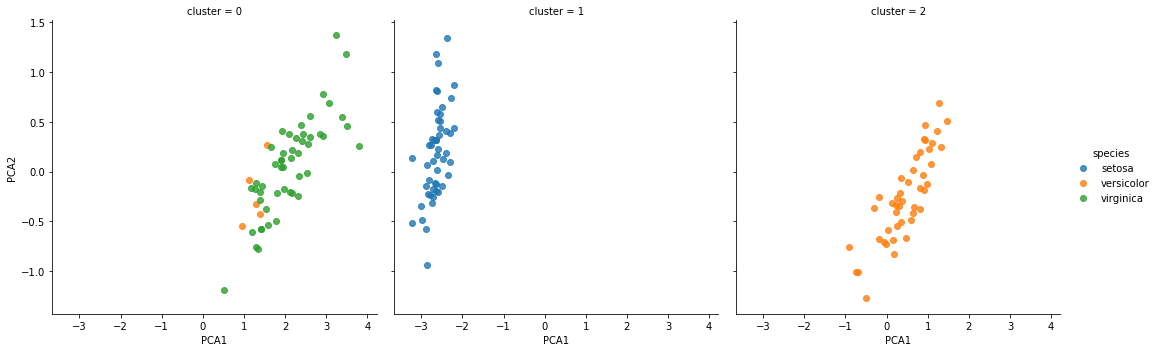

In [88]:
sns.lmplot("PCA1", "PCA2", data=iris_pca, hue='species', col='cluster', fit_reg=False);

Depois de separar os dados por número de cluster, vemos exatamente o grau de eficiência com que o algoritmo GMM recuperou os grupos subjacente: a espécie *setosa* é separada perfeitamente dentro do cluster 0, embora apareça uma pequena parte misturada entre *versicolor* e *virginica*. 

Isso significa que mesmo sem um especialista que nos diga as classificações de cada flor, as medidas dessas observações são suficientemente diferentes para que seja possível identificar *automaticamente* a presença desses diferentes grupos de espécies com um simples algoritmo de clustering. 

Esse tipo de algoritmo poderia até dar aos especialistas na disciplina algumas pistas sobre as relações entre as amostras observadas (??).

## Resumindo

Nesta seção, abordamos as características essenciais da representação de dados em Scikit-Learn e a API de estimadores. 

Sem importar o tipo de estimador, o mesmo padrão de importar/instanciar/ajustar/prever se mantém em todos os casos. 

Com essas novas informações sobre a API de estimadores, você pode explorar a documentação de Scikit-Learn e começar a testar vários modelos sobre os dados. 